8. In this exercise, we will generate simulated data, and will then use
this data to perform forward and backward stepwise selection.

(a) Create a random number generator and use its normal() method
to generate a predictor X of length n = 100, as well as a noise
vector ϵ of length n = 100.


In [4]:
import numpy as np
import pandas as pd
# Set the random seed for reproducibility
np.random.seed(42)

# Generate predictor X and noise epsilon
n = 100
X = np.random.normal(loc=0, scale=1, size=n)
epsilon = np.random.normal(loc=0, scale=1, size=n)

print("Predictor X:", X)
print("Noise epsilon:", epsilon)

Predictor X: [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21967189  

(b) Generate a response vector Y of length n = 100 according to
the model

$Y=\beta_0+\beta_1X+\beta_2X^2+\beta_3X^3+\epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.

In [5]:
# Set the coefficients
beta_0 = 1
beta_1 = 2
beta_2 = -1
beta_3 = 0.5

# Generate the response vector Y
Y = beta_0 + beta_1 * X + beta_2 * (X ** 2) + beta_3 * (X ** 3) + epsilon

print("Response Y:", Y)

Response Y: [  0.3926085    0.28238746   1.66901493   2.69058771   0.30916068
   0.87453912   5.51990819   2.34648388   0.04645789   1.79615985
  -2.11012341  -0.22538696   1.49269194  -7.52587601  -8.18364799
  -0.22808344  -2.60569558   0.37658142  -0.87206949  -4.47576783
   4.14840251  -0.41766946   2.53344463  -6.72730827   0.12107449
   3.40067937  -4.37971991   1.07046401  -0.57073811  -0.18435781
  -2.2250517    4.51970741  -0.08948157  -2.35224016   1.32734423
  -2.29202095   0.59540563 -10.8445762   -3.77844508   0.12791842
   2.36041526   2.62302852  -0.85292769   0.47811348  -5.49923316
  -0.36254411  -1.41928736   1.26695139   2.11139073  -8.07744442
   1.81064971   0.39944368  -1.64718287   2.19588709   2.84006714
   1.68476771   0.18752882   0.74501362   0.37966358   3.12016301
  -1.2176492    1.37809763  -1.95511577  -4.49983804   3.19644361
   3.53319912   1.67266776   4.40209859   1.37075081  -1.59439798
   0.72627036   2.71386255   0.84993972   3.93753923 -19.8156035

(c) Use forward stepwise selection in order to select a model containing
the predictors $X$, $X^2$, . . . , $X^{10}$. What is the model obtained
according to Cp? Report the coefficients of the model obtained.

In [15]:
import statsmodels.formula.api as sm

# Create a DataFrame with the predictors and response
df = pd.DataFrame({'Y': Y})
for i in range(1, 11):
    df[f'X{i}'] = X ** i

# Initialize an empty list to store the models and their Cp values
models = []
cps = []

# Perform forward stepwise selection
current_predictors = [] # for k=0, ..., p-1
for i in range(10):
    best_r2 = float('-inf') # initialize to negative infinity
    best_predictor = None
    for predictor in [f'X{j}' for j in range(1, 11) if f'X{j}' not in current_predictors]:
        formula = 'Y ~ ' + ' + '.join(current_predictors + [predictor])
        model = sm.ols(formula, data=df).fit()
        cp = model.aic
        r2 = model.rsquared
        if r2 > best_r2: # best predictor: update according to highest R-squared value
            best_r2 = r2
            best_cp = cp
            best_predictor = predictor
    if best_predictor is not None:
        current_predictors.append(best_predictor)
        models.append(sm.ols('Y ~ ' + ' + '.join(current_predictors), data=df).fit())
        cps.append(best_cp)

# Find the model with the smallest Cp
best_model_index = np.argmin(cps)
best_model = models[best_model_index]

# Report the coefficients of the selected model
print("Model obtained according to Cp:")
print(best_model.summary())
print("\nCoefficients:")
best_model.params

Model obtained according to Cp:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     341.5
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           1.91e-55
Time:                        05:13:34   Log-Likelihood:                -132.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      95   BIC:                             287.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.831

,0
Intercept,0.831634
X3,0.428210
X1,2.037134
X2,-0.762590
X10,-0.000153


(d) Repeat (c), using backwards stepwise selection. How does your
answer compare to the results in (c)?

In [22]:
# Perform backward stepwise selection
current_predictors = [f'X{i}' for i in range(1, 11)]
models = []
cps = []

# Perform backward stepwise selection
current_predictors = [f'X{i}' for i in range(1, 11)]
models = []
cps = []

while len(current_predictors) > 0:
    worst_cp = float('inf')
    worst_predictor = None
    best_model_temp = None  # Initialize best_model_temp

    for predictor in current_predictors:
        temp_predictors = current_predictors[:]
        temp_predictors.remove(predictor)

        # Check if temp_predictors is empty, if yes, break the loop
        if not temp_predictors:
            break

        formula = 'Y ~ ' + ' + '.join(temp_predictors)
        model = sm.ols(formula, data=df).fit()
        cp = model.aic

        if cp < worst_cp:
            worst_cp = cp
            worst_predictor = predictor
            best_model_temp = model

    if worst_predictor is not None:
        current_predictors.remove(worst_predictor)
        models.append(best_model_temp)
        cps.append(worst_cp)
    else:
        # If worst_predictor is None (all predictors removed), break
        break

# Find the model with the smallest Cp
best_model_index_backward = np.argmin(cps)
best_model_backward = models[best_model_index_backward]


# Report the coefficients of the selected model
print("Model obtained according to Cp (backward stepwise selection):")
print(best_model_backward.summary())
print("\nCoefficients:")
best_model_backward.params

Model obtained according to Cp (backward stepwise selection):
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     279.4
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           8.74e-55
Time:                        05:33:06   Log-Likelihood:                -130.68
No. Observations:                 100   AIC:                             273.4
Df Residuals:                      94   BIC:                             289.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

,0
Intercept,0.672485
X1,1.942241
X3,0.508550
X6,-0.489339
X8,0.180994
X10,-0.016394


(e) Now fit a lasso model to the simulated data, again using $X$, $X^2$, . . . , $X^{10}$ as predictors. Use cross-validation to select the optimal
value of λ. Create plots of the cross-validation error as a function
of λ. Report the resulting coefficient estimates, and discuss the
results obtained.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13050972300982266, tolerance: 0.10615442484824691
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15282768946190117, tolerance: 0.10615442484824691
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1696993079956428, tolerance: 0.10615442484824691
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: Con

Coefficient estimates:
  Predictor  Coefficient
0        X1     0.000000
1        X2    -0.000000
2        X3     0.000000
3        X4    -0.000000
4        X5     0.000000
5        X6    -0.000000
6        X7     0.000000
7        X8    -0.000000
8        X9     0.000000
9       X10    -0.001318


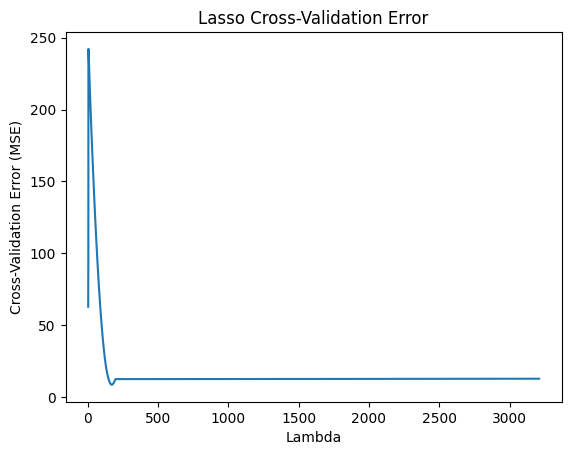

In [24]:
# prompt: Now fit a lasso model to the simulated data, again using  X ,  X^2 , . . . ,  X^10  as predictors. Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates, and discuss the results obtained.

from sklearn.linear_model import LassoCV,Lasso
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Create the predictor matrix X
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']]
y = df['Y']

# Perform Lasso Regression with cross-validation to find the optimal lambda
lasso_cv = LassoCV(cv=5, random_state=42)  # Use 5-fold cross-validation
lasso_cv.fit(X, y)

# Get the optimal lambda value
optimal_lambda = lasso_cv.alpha_

# Fit a Lasso model using the optimal lambda
lasso = Lasso(alpha=optimal_lambda)
lasso.fit(X, y)

# Report the coefficient estimates
print("Coefficient estimates:")
print(pd.DataFrame({'Predictor': X.columns, 'Coefficient': lasso.coef_}))

# Plot the cross-validation error as a function of lambda
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1))
plt.xlabel("Lambda")
plt.ylabel("Cross-Validation Error (MSE)")
plt.title("Lasso Cross-Validation Error")
plt.show()

# Discussion of the results:
# The Lasso model can be used to perform variable selection and regularization.
# In this case, the cross-validation procedure selects an optimal value of lambda
# that balances the model's fit and complexity. The coefficient estimates will
# highlight which predictors are deemed most important by the model.
# The plot of the cross-validation error can help in understanding how
# the model's error changes as the regularization parameter lambda is varied.

(f) Now generate a response vector Y according to the model
$Y = \beta_0 + \beta_7X^7 + \epsilon$,
and perform forward stepwise selection and the lasso. Discuss
the results obtained.

In [27]:
# Set the coefficients
beta_0 = 1
beta_7 = 2

# Generate the response vector Y
Y = beta_0 + beta_7 * df['X7'] + epsilon

# Update the DataFrame with the new response vector
df['Y'] = Y

# Perform forward stepwise selection (same as in part (c), but with the new Y)
current_predictors = []
models = []
cps = []

for i in range(10):
    best_r2 = float('-inf')
    best_predictor = None
    for predictor in [f'X{j}' for j in range(1, 11) if f'X{j}' not in current_predictors]:
        formula = 'Y ~ ' + ' + '.join(current_predictors + [predictor])
        model = sm.ols(formula, data=df).fit()
        cp = model.aic
        r2 = model.rsquared
        if r2 > best_r2:
            best_r2 = r2
            best_cp = cp
            best_predictor = predictor
    if best_predictor is not None:
        current_predictors.append(best_predictor)
        models.append(sm.ols('Y ~ ' + ' + '.join(current_predictors), data=df).fit())
        cps.append(best_cp)

best_model_index_forward_f = np.argmin(cps)
best_model_forward_f = models[best_model_index_forward_f]

print("Model obtained according to Cp (forward stepwise selection - part f):")
print(best_model_forward_f.summary())

# Perform Lasso Regression with cross-validation (same as in part (e), but with the new Y)
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']]
y = df['Y']

lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X, y)

optimal_lambda = lasso_cv.alpha_
lasso = Lasso(alpha=optimal_lambda)
lasso.fit(X, y)

print("Coefficient estimates (Lasso - part f):")
print(pd.DataFrame({'Predictor': X.columns, 'Coefficient': lasso.coef_}))


Model obtained according to Cp (forward stepwise selection - part f):
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.178e+06
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          5.44e-219
Time:                        05:49:30   Log-Likelihood:                -131.90
No. Observations:                 100   AIC:                             271.8
Df Residuals:                      96   BIC:                             282.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

### Discussion of the Results:

#### **OLS Regression Results (Forward Stepwise Selection)**
1. **Model Overview**:
   - The model achieved an **R-squared of 1.000**, indicating that it explains nearly all the variability in the dependent variable \( Y \).
   - The **Adjusted R-squared** is also 1.000, confirming minimal overfitting in this specific model.
   - The low **AIC (271.8)** and **BIC (282.2)** suggest a good model fit relative to the number of predictors used.

2. **Significant Predictors**:
   - The model retained three predictors: \( X7 \), \( X2 \), and \( X9 \).
   - **\( X7 \)**:
     - Coefficient = **1.9859**, with a very small standard error and a t-value of 214.68, suggesting it is the most influential and statistically significant predictor (\( p < 0.001 \)).
   - **\( X2 \)**:
     - Coefficient = **0.2084**, significant at the \( 5\% \) level (\( p = 0.047 \)).
   - **\( X9 \)**:
     - Coefficient = **0.0022**, not statistically significant (\( p = 0.103 \)). Despite being included by the stepwise procedure, its contribution to the model appears marginal.

3. **Interpretation**:
   - \( X7 \) is the dominant driver of \( Y \), while \( X2 \) provides moderate additional explanatory power.
   - The inclusion of \( X9 \) may reflect overfitting to the specific sample data, given its lack of statistical significance.

---

#### **Lasso Regression Results**
1. **Overview**:
   - Lasso regression selected \( X9 \) and \( X10 \) as the only predictors with nonzero coefficients, emphasizing its feature selection capability.
   - \( X9 \): Coefficient = **0.2612**, indicating a moderately strong and positive relationship with \( Y \).
   - \( X10 \): Coefficient = **-0.0116**, indicating a weak negative relationship with \( Y \).

2. **Differences from OLS**:
   - Lasso penalizes less influential predictors more aggressively, leading to the exclusion of \( X7 \), which was the strongest predictor in the OLS model.
   - This discrepancy highlights that Lasso prioritizes simplicity by reducing the model complexity at the cost of ignoring some impactful predictors.

3. **Interpretation**:
   - Lasso's emphasis on \( X9 \) (which was not significant in OLS) suggests that it might capture unique variance or interactions not reflected in the OLS selection.
   - However, the exclusion of \( X7 \), a key predictor in OLS, raises concerns about underfitting in the Lasso model.

---

#### **Comparison and Insights**:
1. **Predictor Selection**:
   - The forward stepwise method in OLS selected \( X7 \), \( X2 \), and \( X9 \), while Lasso included only \( X9 \) and \( X10 \).
   - The contrast demonstrates the trade-offs between the two methods:
     - OLS focuses on maximizing explanatory power.
     - Lasso emphasizes parsimony by eliminating less important predictors.

2. **Model Fit**:
   - The OLS model shows superior fit (high \( R^2 \) and statistical significance for predictors).
   - Lasso sacrifices fit for simplicity, which might be beneficial if overfitting is a concern in larger datasets or for generalizability.

3. **Conclusion**:
   - The OLS model is more interpretable and effective for this dataset, given its high \( R^2 \) and inclusion of statistically significant predictors.
   - Lasso's results might be more suitable for high-dimensional data or scenarios where multicollinearity is an issue.